In [38]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('source3.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread('temp1.png', 0)
template2 = cv2.imread('temp2.jpeg', 0)

In [39]:
height, width = template1.shape[::]
height, width = template2.shape[::]

In [40]:
res1 = cv2.matchTemplate(img_gray, template1, cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray, template2, cv2.TM_CCOEFF_NORMED)

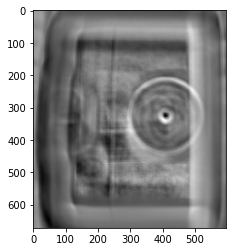

In [41]:
plt.imshow(res1, cmap='gray')
plt.imshow(res2, cmap='gray')

In [42]:
threshold = 0.4 #For TM_CCOEFF_NORMED, larger values means good fit
loc1 = np.where( res1 >= threshold)
threshold = 0.5 #For TM_CCOEFF_NORMED, larger values means good fit
loc2 = np.where( res2 >= threshold)

In [43]:
x = 0
y = 0
for pt in zip(*loc1[::-1]):
   cv2.rectangle(img_rgb, pt, (pt[0] + width, pt[1] + height), (255, 0, 0), 1)
   x = x + 1
for pt in zip(*loc2[::-1]):
   cv2.rectangle(img_rgb, pt, (pt[0] + width, pt[1] + height), (255, 0, 0), 1)
   y = y + 1
if(x==0 and y==0):
    print("incorrect input")    
elif(x == 0):
    print("healthy")
elif(y == 0):
    print("unhealthy")

unhealthy


In [44]:
img_rgb1 = cv2.resize(img_rgb , (500 , 540))
cv2.imshow("Matched image", img_rgb1)
cv2.waitKey()
cv2.destroyAllWindows()